## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16


In [3]:
study_results.head(1)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0


In [4]:
# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
subjectCt = (merged_df["Mouse ID"]).nunique()
print(subjectCt)

249


In [6]:
duplicates = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False),'Mouse ID']

In [7]:
print(duplicates)

908    g989
909    g989
910    g989
911    g989
912    g989
913    g989
914    g989
915    g989
916    g989
917    g989
Name: Mouse ID, dtype: object


## <span style="color: black;">   Fig 1.1  All Data for Duplicate Mouse ID

In [8]:
#List all data for duplicate mice by ID
merged_df.loc[merged_df['Mouse ID'] == 'g989', :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
## Assign Variables to each relevant Series in the DataFrame
tPt = merged_df['Timepoint']
tVol = merged_df['Tumor Volume (mm3)']
sex = merged_df['Sex']
dReg = merged_df['Drug Regimen']
wt = merged_df['Weight (g)']

## Assign Treatments to a List
scrip_list = merged_df['Drug Regimen'].unique()
scrip_list

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [10]:
# Drop all the rows for the mouse with duplicates
# merged_df.drop(index=[908 to 920], inplace = True)
merged_df.drop(index=[908,909,910,911,912,913,914,915,916,917,918,919,920], inplace=True)

## <span style="color: black;">Corrected Subject Count

In [11]:
# Check the number of mice in the cleaned up DataFrame.
subjectCt = (merged_df["Mouse ID"]).nunique()
print(subjectCt)

248


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
drug_reg = merged_df.groupby(['Drug Regimen'])
avgVol = drug_reg[['Tumor Volume (mm3)']].mean()
medVol = drug_reg[['Tumor Volume (mm3)']].median()
varVol = drug_reg[['Tumor Volume (mm3)']].var()
stdVol = drug_reg[['Tumor Volume (mm3)']].std()
semVol = drug_reg[['Tumor Volume (mm3)']].sem()

## <span style="color: black;">Average Tumor Volume Summary

In [13]:
avgVol.head(10)

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


## <span style="color: black;">Median Tumor Volume Summary

In [14]:
medVol.head(10)

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.446266
Ramicane,40.673236
Stelasyn,52.431737


## <span style="color: black;">Variance Tumor Volume Summary

In [15]:
varVol.head(10)

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.852013
Ramicane,23.486704
Stelasyn,59.450562


## <span style="color: black;">Standard Deviation Tumor Volume Summary

In [16]:
stdVol.head(11)

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.622085
Ramicane,4.846308
Stelasyn,7.710419


## <span style="color: black;">Standard Error of the Mean Tumor Volume Summary

In [17]:
semVol.head(11)

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955
Stelasyn,0.573111


In [18]:
# Using the aggregation method, produce the same summary statistics in a single line

## <span style="color: black;">Summary Table of Above data using Aggregate method

In [19]:
drug_reg.agg( {'Tumor Volume (mm3)': ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [20]:
# Reduce Drug Groupby to only Timepoint Data
drug_tPt = drug_reg[['Timepoint']].count()

AttributeError: 'AxesSubplot' object has no attribute 'set_xticklables'

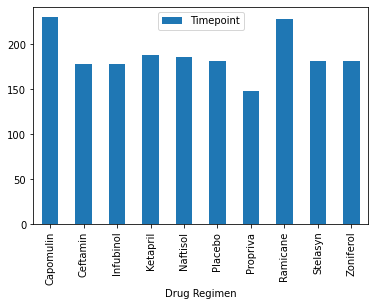

In [21]:
#merged_df["Sex"].value_counts.plot(kind='pie')
tPts_bar = drug_tPt.plot(kind='bar')
tPts_bar.set_xticklables(barplot['Drug Regimen'])

<BarContainer object of 1 artists>

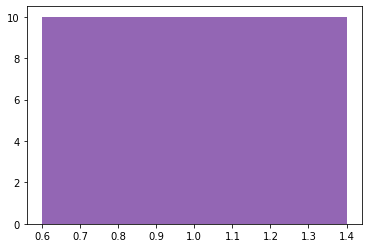

In [22]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug = drug_tPt[['Timepoint']].count()
b_axis = (drug).all()

plt.bar(b_axis, drug, color="indigo", alpha=(0.6), align="center")

In [ ]:
tick_loc = [value for value in b_axis]
plt.xticks(tick_loc, [drug_tPt['Drug Regimen']])

<AxesSubplot:ylabel='Sex'>

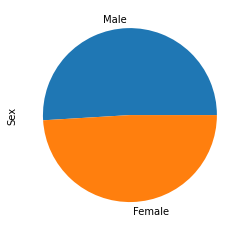

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
merged_df["Sex"].value_counts().plot(kind='pie')

In [37]:
# Set Variables for Pie Chart
labels = ['Female', 'Male']
sizes = merged_df['Sex'].count()
colors = ['yellow', 'indigo']
explode = [0.01, 0.01]

In [40]:
plt.pie(sizes, explode= explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, \
        startangle=90, center(0,0))
plt.axis('equal')

SyntaxError: positional argument follows keyword argument (2067969048.py, line 2)

## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Group the orig Cleaned Dataframe by Subject and Greatest Timepoint
max_tPts = merged_df.groupby('Mouse ID').max()['Timepoint']

In [51]:
# Merge max timepoint data with orig clean dataframe on Subject ID
max_tPts = pd.merge(max_tPts, merged_df, on=['Mouse ID', 'Timepoint'], how='outer')

In [44]:
# List drug regimens of interest; Capomulin, Ramicane, Infubinol, and Ceftamin
# & start columns for empty dataframe
drug = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
maxVLst = []
outlierLst = []
maxVol_df = pd.DataFrame()

# <span style="color: blue;">CURRENTLY</span> <span style="color: green;">WORKING</span> <span style="color: red;">HERE</span>

In [ ]:
# Create forLoop to iterate last timepoints and gather max volumes
for index, drug in enumerate(drug):

In [42]:
    # Start by getting the last (greatest) timepoint for each mouse and fill new dataframe list
    lastVol = max_tPts.loc[max_tPts['Drug Regimen'] == drug, :]
    
    maxVList.append(lastVol['Tumor Volume (mm3)'])

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Plot the charts and apply some styling
## BASIC danger_drop, = plt.plot(time, danger_drop_speeds, color="indigo", alpha=(0.6), label="Danger Drop")
## BASIC railgun, = plt.plot(time, railgun_speeds, color="blue", label="RailGun")

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
## BASIC plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
